In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as goİ
# Set notebook mode to work in offline
pyo.init_notebook_mode()
import datetime
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import chart_studio.plotly.plotly as py

from ipywidgets import HBox,VBox

# Read Data For City

In [5]:
City = pd.read_csv('CityLevelAnalysis.csv')

In [6]:
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Columns: 131 entries, Unnamed: 0 to 2022-07-31
dtypes: float64(127), int64(1), object(3)
memory usage: 461.7+ KB


In [7]:
City

Unnamed: 0                 City                   Metro  \
0             0               Parker  Denver-Aurora-Lakewood   
1             1               Aurora  Denver-Aurora-Lakewood   
2             2              Greeley                 Greeley   
3             3               Aurora  Denver-Aurora-Lakewood   
4             4         Fort Collins            Fort Collins   
..          ...                  ...                     ...   
446         446                Grant  Denver-Aurora-Lakewood   
447         447                 Pine  Denver-Aurora-Lakewood   
448         448     Colorado Springs        Colorado Springs   
449         449       Grand Junction          Grand Junction   
450         450  Mount Crested Butte                     NaN   

           CountyName  2012-01-31  2012-02-29  2012-03-31  2012-04-30  \
0      Douglas County    326301.0    327637.0    329400.0    323152.0   
1     Arapahoe County    177563.0    179084.0    180215.0    181880.0   
2         Weld County    184111.0    185211.0    186034.0    187204.0   
3     Arapahoe County    226954.0    228809.0    230689.0    233096.0   
4      Larimer County    254155.0    254755.0    256414.0    257860.0   
..                ...         ...         ...         ...         ...   
446       Park County    226309.0    226611.0    226817.0    227084.0   
447  Jefferson County         NaN         NaN         NaN         NaN   
448    El Paso County         NaN         NaN         NaN         NaN   
449       Mesa County    252473.0    251208.0    250739.0    252843.0   
450   Gunnison County    259366.0    258756.0    257603.0    256662.0   

     2012-05-31  2012-06-30  ...  2021-10-31  2021-11-30  2021-12-31  \
0      317997.0    312852.0  ...    664500.0    674933.0    687309.0   
1      182974.0    185243.0  ...    475951.0    482666.0    491113.0   
2      188082.0    188431.0  ...    437102.0    442695.0    446758.0   
3      234685.0    236971.0  ...    541677.0    549426.0    559504.0   
4      259197.0    259254.0  ...    532241.0    538915.0    547723.0   
..          ...         ...  ...         ...         ...         ...   
446    227891.0    229107.0  ...    518102.0    524636.0    535514.0   
447         NaN         NaN  ...         NaN    637744.0    649932.0   
448         NaN         NaN  ...    463983.0    458189.0    455962.0   
449    256026.0    257758.0  ...    514610.0    519702.0    523654.0   
450    255967.0    256301.0  ...    445034.0    448318.0    455357.0   

     2022-01-31  2022-02-28  2022-03-31  2022-04-30  2022-05-31  2022-06-30  \
0      700448.0    720435.0    735422.0    749450.0    752333.0    752067.0   
1      502255.0    513093.0    525547.0    533779.0    541139.0    541344.0   
2      450883.0    458887.0    469284.0    481308.0    487882.0    491289.0   
3      572231.0    584176.0    597715.0    607299.0    615903.0    617123.0   
4      557210.0    566742.0    575591.0    586157.0    596794.0    603358.0   
..          ...         ...         ...         ...         ...         ...   
446    547220.0    554353.0    557435.0    559918.0    581230.0    600737.0   
447    661717.0    675245.0    689002.0    702546.0    713151.0    717590.0   
448    461317.0    471206.0    480758.0    491435.0    500347.0    509513.0   
449    531320.0    539841.0    552918.0    564189.0    571418.0    574742.0   
450    461312.0    466807.0    467989.0    470813.0    474637.0    482876.0   

     2022-07-31  
0      744450.0  
1      537865.0  
2      490224.0  
3      613693.0  
4      603373.0  
..          ...  
446    616584.0  
447    717919.0  
448    516881.0  
449    577068.0  
450    490631.0  

[451 rows x 131 columns]

# We Have 320 different Cities

In [8]:
City['City'].nunique()

320

In [9]:
City['City'].value_counts().head()

Denver              28
Colorado Springs    22
Aurora              10
Grand Junction       7
Pueblo               7
Name: City, dtype: int64

In [10]:
City

Unnamed: 0                 City                   Metro  \
0             0               Parker  Denver-Aurora-Lakewood   
1             1               Aurora  Denver-Aurora-Lakewood   
2             2              Greeley                 Greeley   
3             3               Aurora  Denver-Aurora-Lakewood   
4             4         Fort Collins            Fort Collins   
..          ...                  ...                     ...   
446         446                Grant  Denver-Aurora-Lakewood   
447         447                 Pine  Denver-Aurora-Lakewood   
448         448     Colorado Springs        Colorado Springs   
449         449       Grand Junction          Grand Junction   
450         450  Mount Crested Butte                     NaN   

           CountyName  2012-01-31  2012-02-29  2012-03-31  2012-04-30  \
0      Douglas County    326301.0    327637.0    329400.0    323152.0   
1     Arapahoe County    177563.0    179084.0    180215.0    181880.0   
2         Weld County    184111.0    185211.0    186034.0    187204.0   
3     Arapahoe County    226954.0    228809.0    230689.0    233096.0   
4      Larimer County    254155.0    254755.0    256414.0    257860.0   
..                ...         ...         ...         ...         ...   
446       Park County    226309.0    226611.0    226817.0    227084.0   
447  Jefferson County         NaN         NaN         NaN         NaN   
448    El Paso County         NaN         NaN         NaN         NaN   
449       Mesa County    252473.0    251208.0    250739.0    252843.0   
450   Gunnison County    259366.0    258756.0    257603.0    256662.0   

     2012-05-31  2012-06-30  ...  2021-10-31  2021-11-30  2021-12-31  \
0      317997.0    312852.0  ...    664500.0    674933.0    687309.0   
1      182974.0    185243.0  ...    475951.0    482666.0    491113.0   
2      188082.0    188431.0  ...    437102.0    442695.0    446758.0   
3      234685.0    236971.0  ...    541677.0    549426.0    559504.0   
4      259197.0    259254.0  ...    532241.0    538915.0    547723.0   
..          ...         ...  ...         ...         ...         ...   
446    227891.0    229107.0  ...    518102.0    524636.0    535514.0   
447         NaN         NaN  ...         NaN    637744.0    649932.0   
448         NaN         NaN  ...    463983.0    458189.0    455962.0   
449    256026.0    257758.0  ...    514610.0    519702.0    523654.0   
450    255967.0    256301.0  ...    445034.0    448318.0    455357.0   

     2022-01-31  2022-02-28  2022-03-31  2022-04-30  2022-05-31  2022-06-30  \
0      700448.0    720435.0    735422.0    749450.0    752333.0    752067.0   
1      502255.0    513093.0    525547.0    533779.0    541139.0    541344.0   
2      450883.0    458887.0    469284.0    481308.0    487882.0    491289.0   
3      572231.0    584176.0    597715.0    607299.0    615903.0    617123.0   
4      557210.0    566742.0    575591.0    586157.0    596794.0    603358.0   
..          ...         ...         ...         ...         ...         ...   
446    547220.0    554353.0    557435.0    559918.0    581230.0    600737.0   
447    661717.0    675245.0    689002.0    702546.0    713151.0    717590.0   
448    461317.0    471206.0    480758.0    491435.0    500347.0    509513.0   
449    531320.0    539841.0    552918.0    564189.0    571418.0    574742.0   
450    461312.0    466807.0    467989.0    470813.0    474637.0    482876.0   

     2022-07-31  
0      744450.0  
1      537865.0  
2      490224.0  
3      613693.0  
4      603373.0  
..          ...  
446    616584.0  
447    717919.0  
448    516881.0  
449    577068.0  
450    490631.0  

[451 rows x 131 columns]

# Let's Check Another Data

# Read DF for Regions

In [17]:
Region = pd.read_csv('RegionLevelsss.csv')

In [18]:
Region.head(3)

Date                Region              Property_Type  \
0  2012-01-31   La Plata County, CO                Condo/Co-op   
1  2012-01-31       Park County, CO            All Residential   
2  2012-01-31  Montezuma County, CO  Single Family Residential   

   Median_Sale_Price  
0           185000.0  
1           247000.0  
2           123500.0

# Set index From Date Column 

In [19]:
Region.set_index('Date', inplace=True)

In [20]:
Region.head(3)

Region              Property_Type  Median_Sale_Price
Date                                                                          
2012-01-31   La Plata County, CO                Condo/Co-op           185000.0
2012-01-31       Park County, CO            All Residential           247000.0
2012-01-31  Montezuma County, CO  Single Family Residential           123500.0

# 735 Missing Values in Median_Sale_Price 

In [21]:
Region.isna().sum()

Region                 0
Property_Type          0
Median_Sale_Price    735
dtype: int64

# Show some of the Missing Values

In [22]:
Region[Region.isnull().any(axis=1)].head(4)

Region              Property_Type  Median_Sale_Price
Date                                                                        
2014-11-30  El Paso County, CO            All Residential                NaN
2014-11-30  El Paso County, CO                  Townhouse                NaN
2014-11-30  El Paso County, CO  Single Family Residential                NaN
2014-11-30   Teller County, CO            All Residential                NaN

# Region Counts in All of the Data

In [ ]:
Region['Region'].hist(backend='plotly')

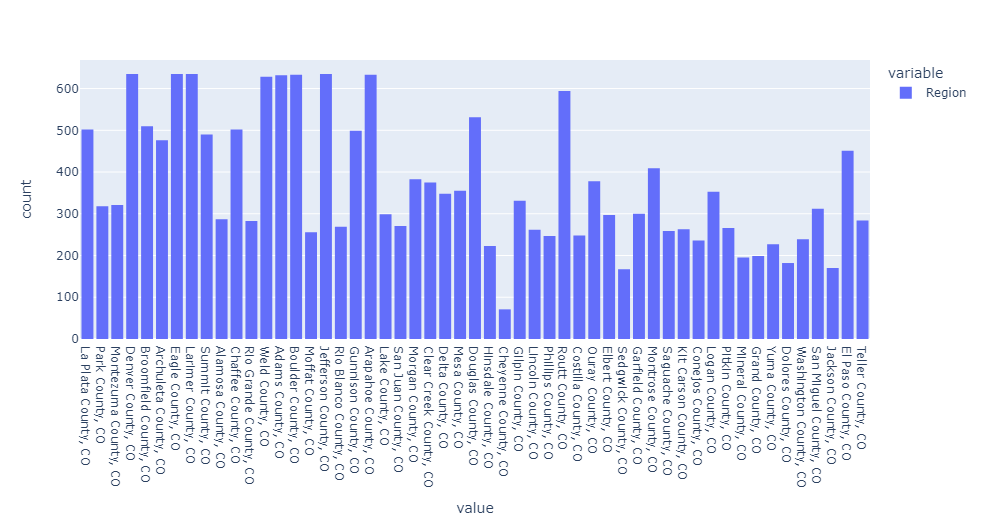

In [ ]:
Region['Property_Type'].hist(title='Number of Property Types in All of The Data', backend='plotly')

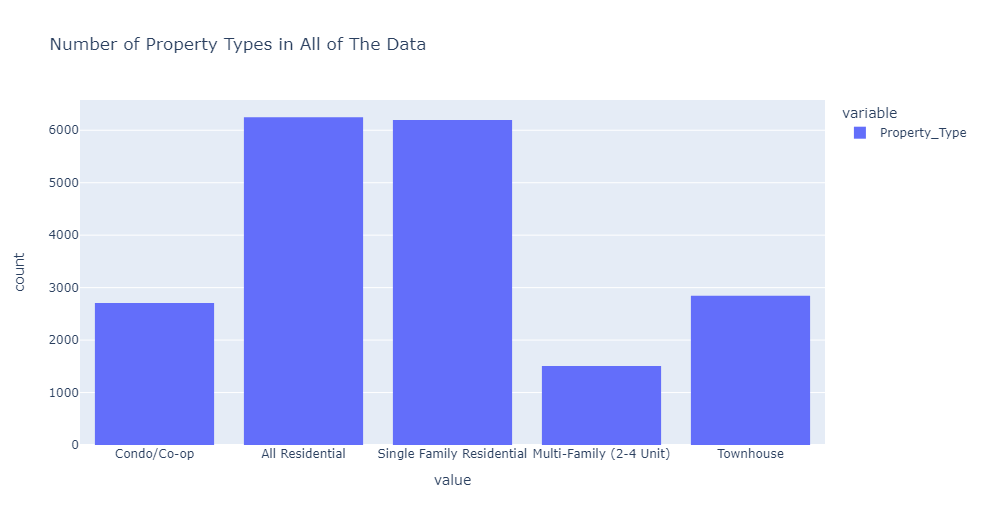

In [23]:
Regionmax200 = Region.sort_values(by='Median_Sale_Price', ascending=False).head(200)

# 200 Houses That Has Max Median Sale Price - Region Counts

In [ ]:
Regionmax200['Region'].hist(backend='plotly')

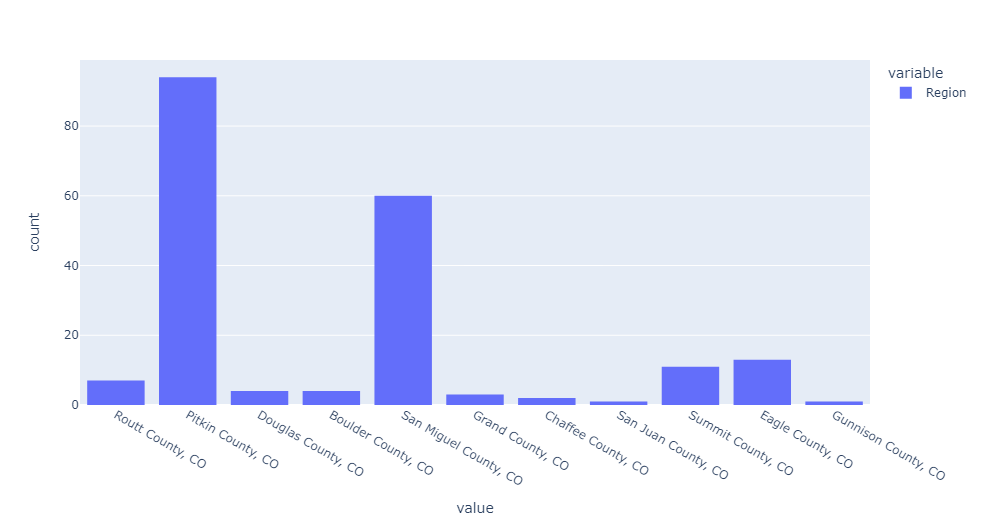

# Property Type Counts for Top Expensive 200 

In [ ]:
Regionmax200['Property_Type'].hist(backend='plotly')

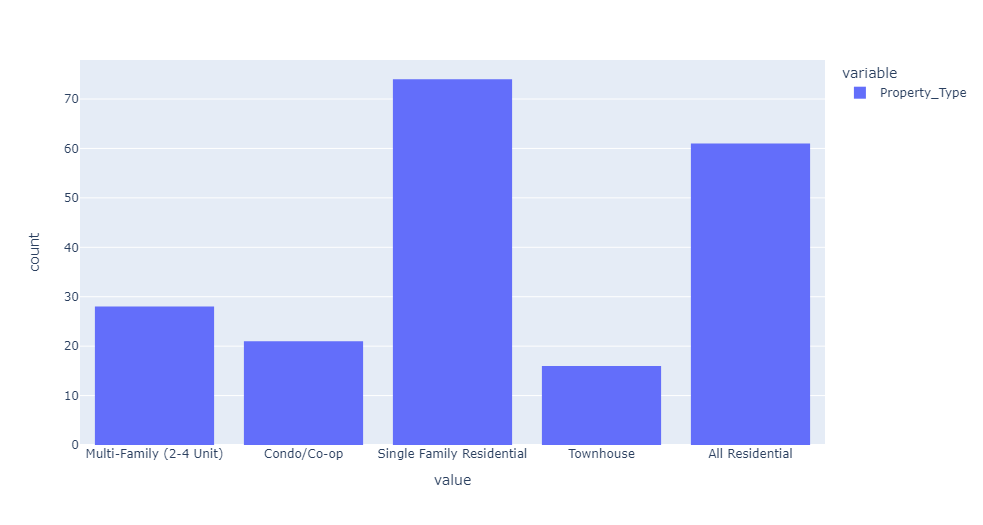

# Seems Like Single Family Residential and All Residential Properties are more expensive than others

# We have 53 different Regions

In [27]:
Region['Region'].nunique()

53

# 5 different Property Types and Their Values


In [28]:
Region.Property_Type.value_counts()

All Residential              6248
Single Family Residential    6196
Townhouse                    2843
Condo/Co-op                  2709
Multi-Family (2-4 Unit)      1508
Name: Property_Type, dtype: int64

# Create Different Datas with Different Properties

# All_Residential Represents all type of Buildings

# Further Analysis Will Be Done With All_Residential Property Type, Because we will have a more general view

### All_Residental represents all building types

In [29]:
All_Residential = Region[Region['Property_Type'] == 'All Residential']
All_Residential.index = pd.to_datetime(All_Residential.index)
Single_Family_Residential = Region[Region['Property_Type'] == 'Single Family Residential']
Townhouse = Region[Region['Property_Type'] == 'Townhouse']
Condo_Coop = Region[Region['Property_Type'] == 'Condo/Co-op']

Multi_Family = Region[Region['Property_Type'] == 'Multi-Family (2-4 Unit)']


In [30]:
All_Residential.head()

Region    Property_Type  Median_Sale_Price
Date                                                                 
2012-01-31        Park County, CO  All Residential           247000.0
2012-01-31   Archuleta County, CO  All Residential           175000.0
2012-01-31  Rio Grande County, CO  All Residential           201250.0
2012-01-31        Weld County, CO  All Residential           176000.0
2012-01-31     Boulder County, CO  All Residential           290000.0

In [31]:
Single_Family_Residential.head()

Region              Property_Type  Median_Sale_Price
Date                                                                          
2012-01-31  Montezuma County, CO  Single Family Residential           123500.0
2012-01-31       Park County, CO  Single Family Residential           247000.0
2012-01-31     Summit County, CO  Single Family Residential           365000.0
2012-01-31    Alamosa County, CO  Single Family Residential           112500.0
2012-01-31      Adams County, CO  Single Family Residential           162500.0

In [32]:
Townhouse.head()

Region Property_Type  Median_Sale_Price
Date                                                             
2012-01-31  Jefferson County, CO     Townhouse           134200.0
2012-01-31      Eagle County, CO     Townhouse           485000.0
2012-01-31    Larimer County, CO     Townhouse           141000.0
2012-01-31       Weld County, CO     Townhouse            74750.0
2012-01-31     Denver County, CO     Townhouse           225000.0

In [33]:
Condo_Coop.head()

Region Property_Type  Median_Sale_Price
Date                                                              
2012-01-31    La Plata County, CO   Condo/Co-op           185000.0
2012-01-31      Denver County, CO   Condo/Co-op           131500.0
2012-01-31  Broomfield County, CO   Condo/Co-op           210000.0
2012-01-31       Eagle County, CO   Condo/Co-op           410000.0
2012-01-31   Archuleta County, CO   Condo/Co-op           299000.0

In [34]:
Multi_Family.head()

Region            Property_Type  Median_Sale_Price
Date                                                                        
2012-01-31    Larimer County, CO  Multi-Family (2-4 Unit)           276000.0
2012-01-31    Chaffee County, CO  Multi-Family (2-4 Unit)           203500.0
2012-01-31  Jefferson County, CO  Multi-Family (2-4 Unit)           209000.0
2012-01-31     Denver County, CO  Multi-Family (2-4 Unit)           230000.0
2012-01-31     Morgan County, CO  Multi-Family (2-4 Unit)            80000.0

# 151 NaN values in Townhouse

In [35]:
Townhouse['Median_Sale_Price'].isna().sum()

151

# Townhouse Prices in Jefferson

In [30]:
Townhouse[Townhouse['Region'] =='Jefferson County, CO']['Median_Sale_Price'].plot(title='Median Price Sales - Townhouse Jefferson ', backend='plotly')

# Some of the Median Sale Graphs 

In [ ]:
lst = Townhouse['Region'].unique()            
for i in lst:
    fig = Townhouse[Townhouse['Region'] ==i ]['Median_Sale_Price'].plot(title= f'{i} Median Price Sales', backend='plotly')
    fig=fig.update()
    fig.show()

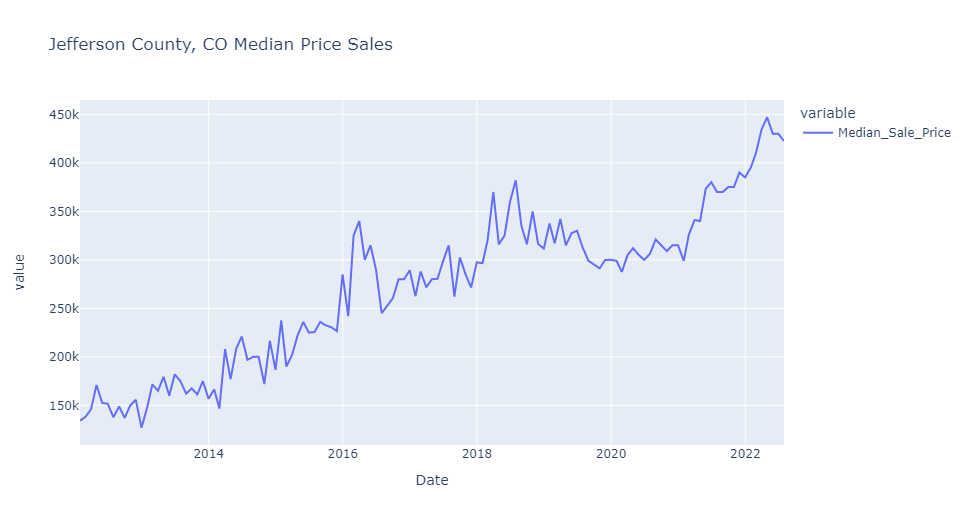

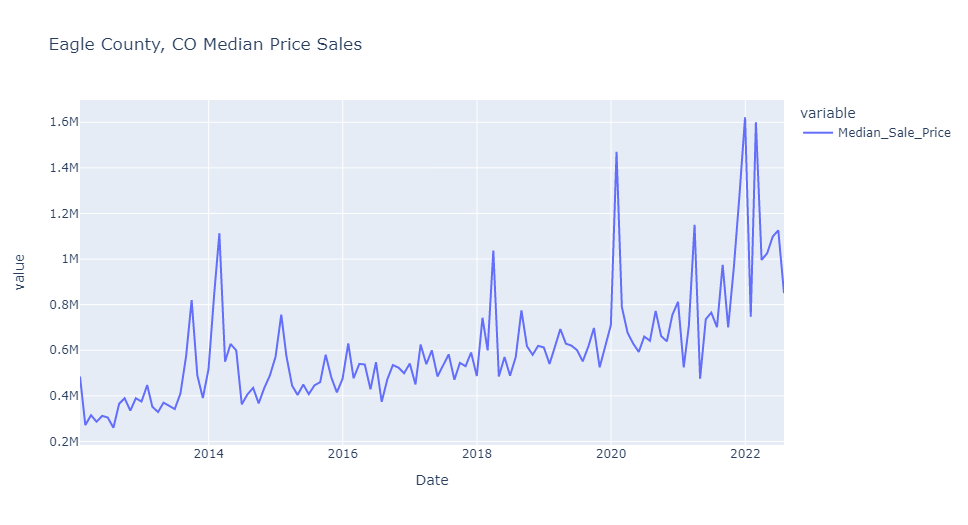

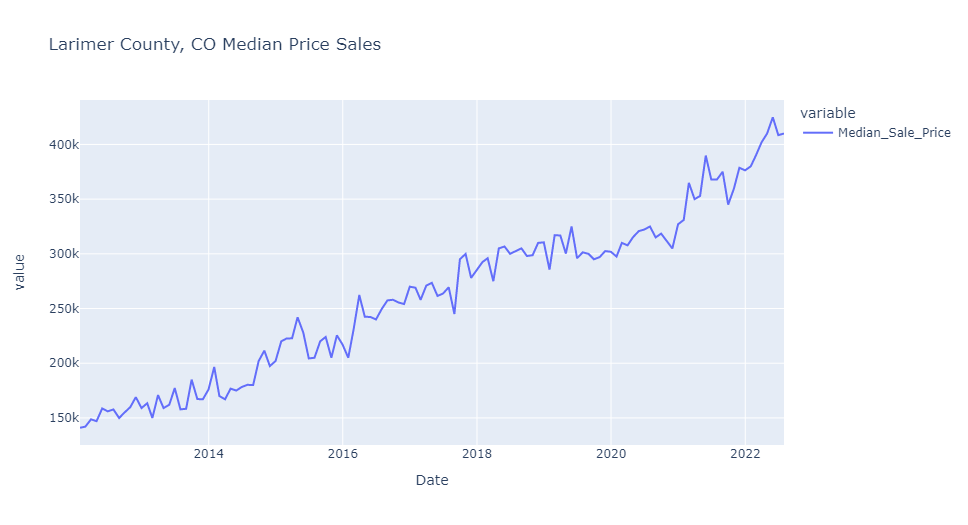

# Checked for which regions has missing values

In [36]:
arr2 = Region['Region'].unique()

In [37]:
x = Region.dropna()

In [38]:
arr = x['Region'].unique()

In [39]:
temp3 = [x for x in arr2 if x not in arr]

In [40]:
temp3

['El Paso County, CO', 'Teller County, CO']

# There are missing values in 'El Paso County, CO', 'Teller County, CO'


In [43]:
Region[Region.isnull().any(axis=1)].head()

Region              Property_Type  Median_Sale_Price
Date                                                                        
2014-11-30  El Paso County, CO            All Residential                NaN
2014-11-30  El Paso County, CO                  Townhouse                NaN
2014-11-30  El Paso County, CO  Single Family Residential                NaN
2014-11-30   Teller County, CO            All Residential                NaN
2014-11-30  El Paso County, CO                Condo/Co-op                NaN

In [44]:
All_Residential = Region[Region['Property_Type'] == 'All Residential']
All_Residential.index = pd.to_datetime(All_Residential.index)

# Filling missing values with interpolation

In [45]:
# After Creating New Months and Filling Their Median_Sale_Prices with Linear Interpolation Method
Jackson = All_Residential[All_Residential['Region']=='Jackson County, CO']
Jackson = Jackson[['Median_Sale_Price']]
Jackson1M = Jackson.asfreq('1M')
Jackson1Mint = Jackson1M.interpolate(method='linear')

In [46]:
# After Creating New Months and Filling Their Median_Sale_Prices with Linear Interpolation Method
Sedgwick = All_Residential[All_Residential['Region']=='Sedgwick County, CO']
Sedgwick = Sedgwick[['Median_Sale_Price']]
Sedgwick1M = Sedgwick.asfreq('1M')
Sedgwick1Mint = Sedgwick1M.interpolate(method="linear")

# Showing Purpose and effect of Interpolation

# Shows the regions that has less records 

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.FigureWidget(make_subplots(vertical_spacing=0.05,horizontal_spacing=0.1
                                    ,rows=2, cols=2
                                   ,column_widths=[0.5, 0.5]
                                   ,subplot_titles=("Jackson County", "Sedgwick County", "", "")))


fig.append_trace(go.Scatter(
    x =  Jackson1M.index,
    y = Jackson1M['Median_Sale_Price'].values,
    name='Before Interpolation',
    line=dict(color='blue', width=2),
),
                 
row=1, col=1)



fig.append_trace(go.Scatter(
   
    x = Jackson1M.index,        
    y= Jackson1Mint['Median_Sale_Price'].values,
    name='After Interpolation',
    line=dict(color='black', width=2),
), row=2, col=1)



fig.append_trace(go.Scatter(
    x =  Sedgwick1M.index,
    y = Sedgwick1M['Median_Sale_Price'].values,
    line=dict(color='blue', width=2),
    showlegend=False
),
                 
row=1, col=2)


 
Sedgwick1Mint

fig.append_trace(go.Scatter(
    x =  Sedgwick1M.index,
    y = Sedgwick1Mint['Median_Sale_Price'].values,
    line=dict(color='black', width=2),
    showlegend=False
),
          
    
row=2, col=2)


fig.update_layout(

    title={
        'text' : "Filling Values With Interpolation ",
        'y':0.95,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'},

    template="simple_white"
    
)


fig.update_layout(height=700, width=1000)
#fig.update_layout(showlegend=False)
                 
fig.show()

In [49]:
[All_Residential.Region.value_counts(ascending=True)[2:18]]

[Sedgwick County, CO       83
 Jackson County, CO        84
 Dolores County, CO        91
 El Paso County, CO        93
 Teller County, CO         93
 Mineral County, CO        97
 San Juan County, CO      103
 Yuma County, CO          108
 Hinsdale County, CO      108
 San Miguel County, CO    113
 Washington County, CO    116
 Conejos County, CO       116
 Phillips County, CO      120
 Costilla County, CO      121
 Rio Blanco County, CO    124
 Lincoln County, CO       125
 Name: Region, dtype: int64]

# For regions whose doesn't has required number of records, the records will be generated by appropriate statistical methods.

# This is the list of counties that doesn't has required count of records

In [50]:
CountyList = ['Sedgwick County, CO','Jackson County, CO','Dolores County, CO','El Paso County, CO','Teller County, CO','Mineral County, CO','San Juan County, CO','Yuma County, CO',
'Hinsdale County, CO',' San Miguel County, CO','Washington County, CO','Conejos County, CO','Phillips County, CO','Costilla County, CO',
'Rio Blanco County, CO','Lincoln County, CO']

In [51]:
All_Residential = Region[Region['Property_Type'] == 'All Residential']
All_Residential.index = pd.to_datetime(All_Residential.index)

# A new dataframe for the regions where we will create new records

In [52]:
Missing_Values=pd.DataFrame()    

In [53]:
Missing_Values

Empty DataFrame
Columns: []
Index: []

# It is a loop that goes around the missing registered ones one by one, generates and fills data monthly, and adds it as a row with the dates to the newly created dataframe.

In [54]:
for i in CountyList:
    county = All_Residential[All_Residential['Region']==i]    
    county = county[['Median_Sale_Price']]
    county1M = county.asfreq('1M')
    county1Mint = county1M.interpolate(method='linear')
   
    #Arrange new value for same columns
    county1Mint['Property_Type'] = 'All Residential'
    county1Mint['Region'] = i
    county1Mint = county1Mint[['Region','Property_Type','Median_Sale_Price']]
    
   
    Missing_Values = pd.concat([Missing_Values,county1Mint],axis=0)
    #Concat again
    #Will work for every counties that has less datas to be analyzed(has missing values)





# Number of records produced for the desired regions at the end of the loop

In [55]:
Missing_Values.Region.value_counts()

Sedgwick County, CO      127
San Juan County, CO      127
Hinsdale County, CO      127
Conejos County, CO       127
Phillips County, CO      127
Costilla County, CO      127
Rio Blanco County, CO    127
Lincoln County, CO       127
Dolores County, CO       126
Mineral County, CO       126
Yuma County, CO          126
Washington County, CO    126
Jackson County, CO       120
El Paso County, CO        93
Teller County, CO         93
Name: Region, dtype: int64

# This region contains purely nan values, so unfortunately we cannot use it in the analysis.

In [56]:
Missing_Values[Missing_Values['Region'] == 'Teller County, CO'] 

Region    Property_Type  Median_Sale_Price
Date                                                             
2014-11-30  Teller County, CO  All Residential                NaN
2014-12-31  Teller County, CO  All Residential                NaN
2015-01-31  Teller County, CO  All Residential                NaN
2015-02-28  Teller County, CO  All Residential                NaN
2015-03-31  Teller County, CO  All Residential                NaN
...                       ...              ...                ...
2022-03-31  Teller County, CO  All Residential                NaN
2022-04-30  Teller County, CO  All Residential                NaN
2022-05-31  Teller County, CO  All Residential                NaN
2022-06-30  Teller County, CO  All Residential                NaN
2022-07-31  Teller County, CO  All Residential                NaN

[93 rows x 3 columns]

In [57]:
Missing_Values[Missing_Values['Region'] == 'El Paso County, CO']  

Region    Property_Type  Median_Sale_Price
Date                                                              
2014-11-30  El Paso County, CO  All Residential                NaN
2014-12-31  El Paso County, CO  All Residential                NaN
2015-01-31  El Paso County, CO  All Residential                NaN
2015-02-28  El Paso County, CO  All Residential                NaN
2015-03-31  El Paso County, CO  All Residential                NaN
...                        ...              ...                ...
2022-03-31  El Paso County, CO  All Residential                NaN
2022-04-30  El Paso County, CO  All Residential                NaN
2022-05-31  El Paso County, CO  All Residential                NaN
2022-06-30  El Paso County, CO  All Residential                NaN
2022-07-31  El Paso County, CO  All Residential                NaN

[93 rows x 3 columns]

#  There is 93 NaN values for El Paso County, CO and Teller County, CO.
# They need to be dropped.

In [58]:
Missing_Values[Missing_Values['Median_Sale_Price'].isna()].Region.value_counts()

El Paso County, CO    93
Teller County, CO     93
Name: Region, dtype: int64

In [59]:
Missing_Values = Missing_Values.reset_index()

# Dropping the regions that contains only NaN values.


In [60]:
Missing_Values.drop(Missing_Values[Missing_Values['Region'] == 'El Paso County, CO'].index, inplace = True)

In [61]:
Missing_Values.drop(Missing_Values[Missing_Values['Region'] == 'Teller County, CO'].index, inplace = True)

In [62]:
Missing_Values.head()

Date               Region    Property_Type  Median_Sale_Price
0 2012-01-31  Sedgwick County, CO  All Residential            29000.0
1 2012-02-29  Sedgwick County, CO  All Residential            25125.0
2 2012-03-31  Sedgwick County, CO  All Residential            21250.0
3 2012-04-30  Sedgwick County, CO  All Residential            17375.0
4 2012-05-31  Sedgwick County, CO  All Residential            13500.0

In [63]:
Missing_Values.index = pd.to_datetime(Missing_Values.Date)

In [64]:
Missing_Values.drop(['Date'],axis=1,inplace=True)

In [65]:
Missing_Values.Region.value_counts()

Sedgwick County, CO      127
San Juan County, CO      127
Hinsdale County, CO      127
Conejos County, CO       127
Phillips County, CO      127
Costilla County, CO      127
Rio Blanco County, CO    127
Lincoln County, CO       127
Dolores County, CO       126
Mineral County, CO       126
Yuma County, CO          126
Washington County, CO    126
Jackson County, CO       120
Name: Region, dtype: int64

# We are completely clearing the data of the regions that are reproduced in our base data, because we are going to replace this data with new ones, for this we completely delete the records with the names of the regions where the value is generated from our master data with a for loop.

In [66]:
All_Residential = All_Residential.reset_index()

In [67]:
for i in CountyList:
    All_Residential.drop(All_Residential[All_Residential['Region'] == i].index, inplace = True)


# As you can see at the end of all these processes, the number of records we have for the regions is close to each other, so the accuracy of the analysis will increase, and you can see that I did not touch the data in some regions like Grand County and Cheyenne County because these regions has very less data and it would be risky to try to generate more data from these data. However, I will still use these regions because they do not carry NaN values.

In [68]:
All_Residential.Region.value_counts()

Park County, CO           127
Clear Creek County, CO    127
Montrose County, CO       127
Adams County, CO          127
Eagle County, CO          127
Lake County, CO           127
Pitkin County, CO         127
Gilpin County, CO         127
Montezuma County, CO      127
Elbert County, CO         127
Denver County, CO         127
Larimer County, CO        127
Routt County, CO          127
Logan County, CO          127
Jefferson County, CO      127
Moffat County, CO         127
Archuleta County, CO      127
Garfield County, CO       127
Broomfield County, CO     127
Douglas County, CO        127
Rio Grande County, CO     127
Weld County, CO           127
Boulder County, CO        127
Arapahoe County, CO       127
Summit County, CO         127
Morgan County, CO         127
Ouray County, CO          127
Delta County, CO          127
Alamosa County, CO        127
Gunnison County, CO       127
Chaffee County, CO        127
La Plata County, CO       127
Mesa County, CO           127
Kit Carson

# At the end of all operations, we assign the date to the index as a datetime object again.

In [69]:
All_Residential.set_index(All_Residential.Date,inplace=True)

In [70]:
All_Residential.drop(['Date'],axis=1,inplace=True)

# Notice that after clearing the data containing the records we are going to generate, the data count drops to 4666.

In [71]:
All_Residential

Region    Property_Type  Median_Sale_Price
Date                                                                 
2012-01-31        Park County, CO  All Residential           247000.0
2012-01-31   Archuleta County, CO  All Residential           175000.0
2012-01-31  Rio Grande County, CO  All Residential           201250.0
2012-01-31        Weld County, CO  All Residential           176000.0
2012-01-31     Boulder County, CO  All Residential           290000.0
...                           ...              ...                ...
2022-07-31  San Miguel County, CO  All Residential           550000.0
2022-07-31     Alamosa County, CO  All Residential           275000.0
2022-07-31      Elbert County, CO  All Residential           742500.0
2022-07-31      Denver County, CO  All Residential           585000.0
2022-07-31      Summit County, CO  All Residential           899000.0

[4666 rows x 3 columns]

# We combine the data we produce with our main data along the vertical axis.

In [72]:
All_Residential = pd.concat([All_Residential,Missing_Values],axis=0)

In [73]:
All_Residential = All_Residential.sort_values('Date')

# After the merge, our main data becomes 6306 rows.

In [74]:
All_Residential

Region    Property_Type  Median_Sale_Price
Date                                                                  
2012-01-31         Park County, CO  All Residential           247000.0
2012-01-31       Pitkin County, CO  All Residential          2350000.0
2012-01-31   Kit Carson County, CO  All Residential            29000.0
2012-01-31       Gilpin County, CO  All Residential           241250.0
2012-01-31  Clear Creek County, CO  All Residential           125950.0
...                            ...              ...                ...
2022-07-31     La Plata County, CO  All Residential           578750.0
2022-07-31       Moffat County, CO  All Residential           277000.0
2022-07-31     Garfield County, CO  All Residential           615000.0
2022-07-31       Gilpin County, CO  All Residential           482000.0
2022-07-31      Lincoln County, CO  All Residential           169900.0

[6306 rows x 3 columns]

# The count of the records of the regions after merge.

In [75]:
All_Residential.Region.value_counts()

Park County, CO           127
Sedgwick County, CO       127
Adams County, CO          127
Pitkin County, CO         127
Rio Grande County, CO     127
Weld County, CO           127
Arapahoe County, CO       127
Summit County, CO         127
Morgan County, CO         127
Delta County, CO          127
Douglas County, CO        127
Boulder County, CO        127
Gunnison County, CO       127
Garfield County, CO       127
Elbert County, CO         127
Alamosa County, CO        127
Ouray County, CO          127
Broomfield County, CO     127
Mesa County, CO           127
La Plata County, CO       127
Chaffee County, CO        127
Montrose County, CO       127
Archuleta County, CO      127
Eagle County, CO          127
Jefferson County, CO      127
Gilpin County, CO         127
Clear Creek County, CO    127
Montezuma County, CO      127
Denver County, CO         127
Lake County, CO           127
Routt County, CO          127
Logan County, CO          127
Larimer County, CO        127
Moffat Cou

# Loop For Calculating 10 year and 1 year ROI for every Region and Townhouse Property Type

# We put all the region names in a list.

In [76]:
lst = All_Residential['Region'].unique()            

In [77]:
lst

array(['Park County, CO', 'Pitkin County, CO', 'Kit Carson County, CO',
       'Gilpin County, CO', 'Clear Creek County, CO',
       'Montezuma County, CO', 'Denver County, CO', 'Larimer County, CO',
       'Routt County, CO', 'Saguache County, CO', 'Logan County, CO',
       'Jefferson County, CO', 'Moffat County, CO', 'Lincoln County, CO',
       'Rio Blanco County, CO', 'Costilla County, CO',
       'Phillips County, CO', 'Conejos County, CO', 'Hinsdale County, CO',
       'San Juan County, CO', 'Lake County, CO', 'Eagle County, CO',
       'Sedgwick County, CO', 'Montrose County, CO', 'Adams County, CO',
       'Archuleta County, CO', 'Rio Grande County, CO', 'Weld County, CO',
       'Arapahoe County, CO', 'Summit County, CO', 'Morgan County, CO',
       'Delta County, CO', 'Douglas County, CO', 'Boulder County, CO',
       'Gunnison County, CO', 'Garfield County, CO', 'Elbert County, CO',
       'Alamosa County, CO', 'Ouray County, CO', 'Cheyenne County, CO',
       'Broomfield C

In [78]:
tenyearchange=[]
forlastyear=[]
for i in lst:
    arr = All_Residential[All_Residential['Region'] == i ]['Median_Sale_Price'].values
    value = ((arr[-1] - arr[0]) * 100 ) / arr[-1]
    valuesforlastyearchg  = ( ( arr[-1] -  arr[-2]) * 100 ) / arr[-1] 
    tenyearchange.append(value)
    forlastyear.append(valuesforlastyearchg)

# First 5 values for Last Year Changes

In [79]:
forlastyear[:5]

[-26.72897196261682,
 -146.06741573033707,
 28.333333333333332,
 -29.356846473029044,
 11.448002266931143]

# Create a new DataFrame with Regions

In [80]:
dfforchanges = pd.DataFrame(lst)

In [81]:
dfforchanges.head()

0
0         Park County, CO
1       Pitkin County, CO
2   Kit Carson County, CO
3       Gilpin County, CO
4  Clear Creek County, CO

# Add 10 Year and Last Year ROI Column

In [82]:
dfforchanges['10 Year Change'] = tenyearchange

In [83]:
dfforchanges['Last Year Change'] = forlastyear

# Rename Columns

In [84]:
dfforchanges.columns=['Regions','10 Year Change','Last Year Change']

# Show 10 Year Changes

In [ ]:
dfforchanges.hist(x='Regions',y='10 Year Change', backend='plotly')

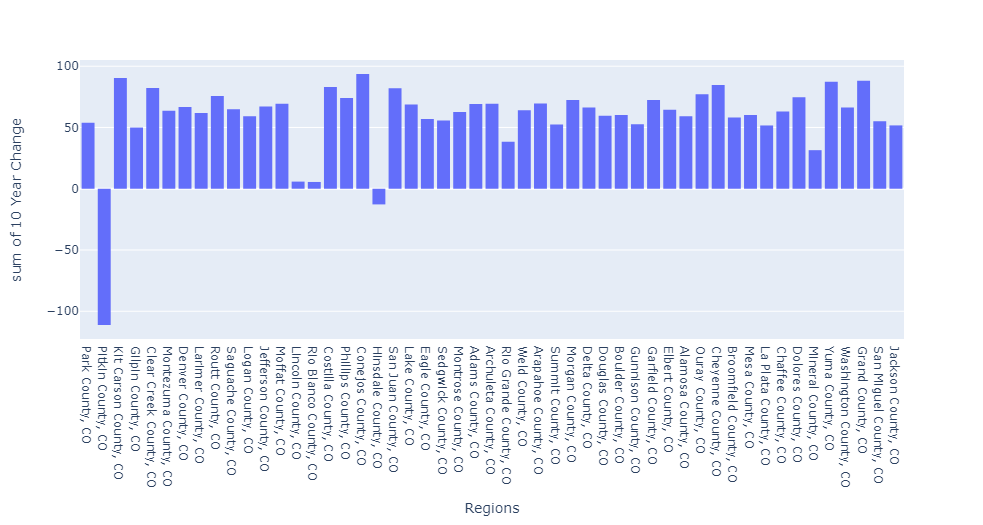

# Better Way to see 10 Year Changes

In [ ]:
import plotly.express as px

fig = px.bar(dfforchanges, x='Regions',y='10 Year Change',
                 
                 
                title="10 Yearly Changes for All Regions",
             orientation='v', width=1000, height=600
            )



fig.show()

# Regions That Has Max 10 Year Changes

In [97]:
dfforchangesbest5 = dfforchanges.sort_values(by='10 Year Change', ascending=False).head()

# Regions That Has Max Last Year Changes

In [98]:
dfforchangesbest5lastyear = dfforchanges.sort_values(by='Last Year Change', ascending=False).head()

In [99]:
order =['Last Year Change','10 Year Change']

# 5  Regions That Has Max Changes for Both of Them.


In [100]:
dfforchangesboth = dfforchanges.sort_values(by=order, ascending=False).head()

# Kit Carson County, seems Best for  " Townhouse " Property Type

In [101]:
dfforchangesboth

Regions  10 Year Change  Last Year Change
17     Conejos County, CO       93.681818         34.181818
44     Dolores County, CO       74.671362         29.577465
2   Kit Carson County, CO       90.333333         28.333333
9     Saguache County, CO       64.821502         28.175960
15    Costilla County, CO       83.020408         28.163265

# 10  Regions That Has Max Changes for Both of Them.

In [102]:
dfforchangesbothten =  dfforchanges.sort_values(by=order, ascending=False).head(10)

In [103]:
import plotly.express as px

fig = px.bar(dfforchangesbest5, x='10 Year Change',y='Regions',
                 
                title="5 Best Countys with 10 Year Max Profit ",
             orientation='h', width=800, height=400
            )



fig.show()

In [ ]:
import plotly.express as px

fig = px.bar(dfforchangesbest5lastyear, x='Last Year Change',y='Regions',
                 labels={
                     "sepal_length": "Sepal Length (cm)",
                     "sepal_width": "Sepal Width (cm)",
                     "species": "Species of Iris"
                 },
                title="Best Regions According to Last Year Performances - Represents Last Year Changes",
             orientation='h', width=800, height=450
            )



fig.show()

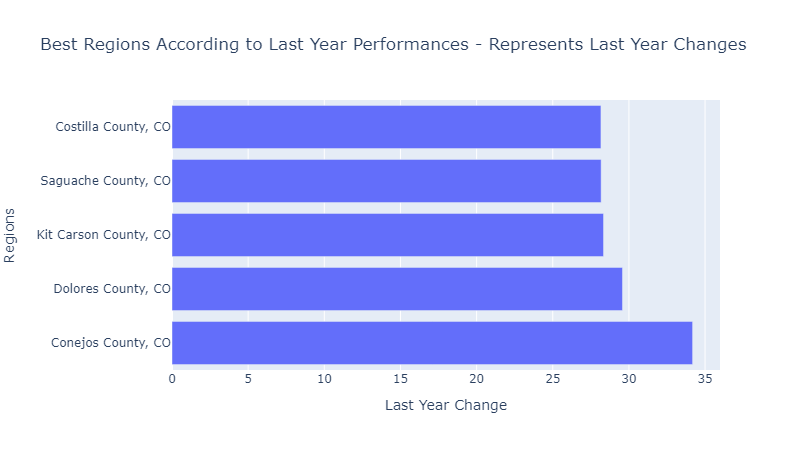

In [ ]:
import plotly.express as px
#Choosen 5 Regions According to Overrall Performance
fig = px.bar(dfforchangesboth, x='Last Year Change',y='Regions',
                 labels={
                     "sepal_length": "Sepal Length (cm)",
                     "sepal_width": "Sepal Width (cm)",
                     "species": "Species of Iris"
                 },
                title=" Best Regions According to Overrall Performances - Represents Last Year Changes" ,
             orientation='h', width=800, height=400
            )



fig.show()

In [ ]:
fig = px.bar(dfforchangesboth, x="Regions", y=["10 Year Change", "Last Year Change"], title="Best 5 Regions - Overall Performance")
fig.show()

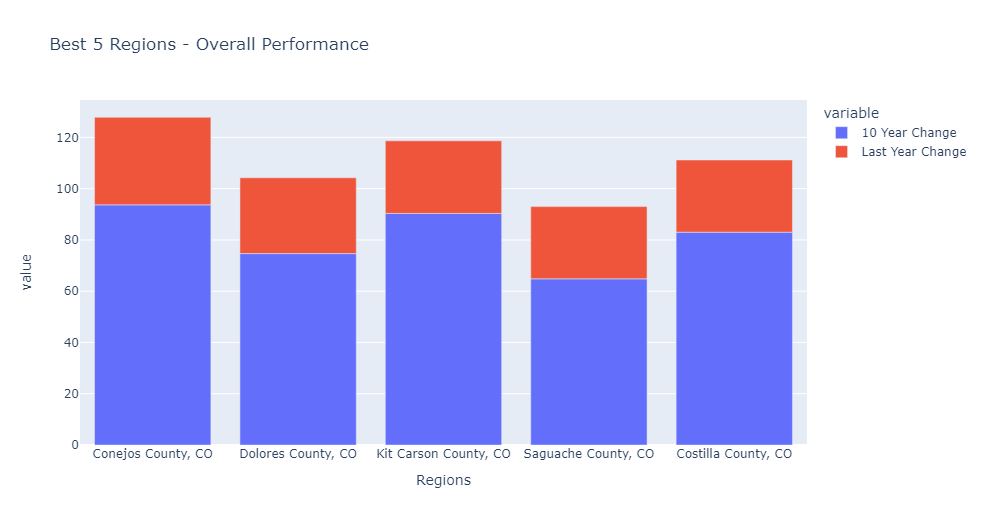

In [ ]:
fig = px.bar(dfforchangesbothten, x="Regions", y=["10 Year Change", "Last Year Change"], title="Best 10 Regions - Overall Performance")
fig.show()

# Best Overall Performance - Kit Carson County - 29K to 300K'' in 10 years

In [ ]:
fig = All_Residential[All_Residential['Region'] =='Kit Carson County, CO' ]['Median_Sale_Price'].plot(title= 'Kit Carson County, CO Median Price Sales 10 Year %90.33 Last Year %28', backend='plotly')
fig=fig.update()
fig.show()

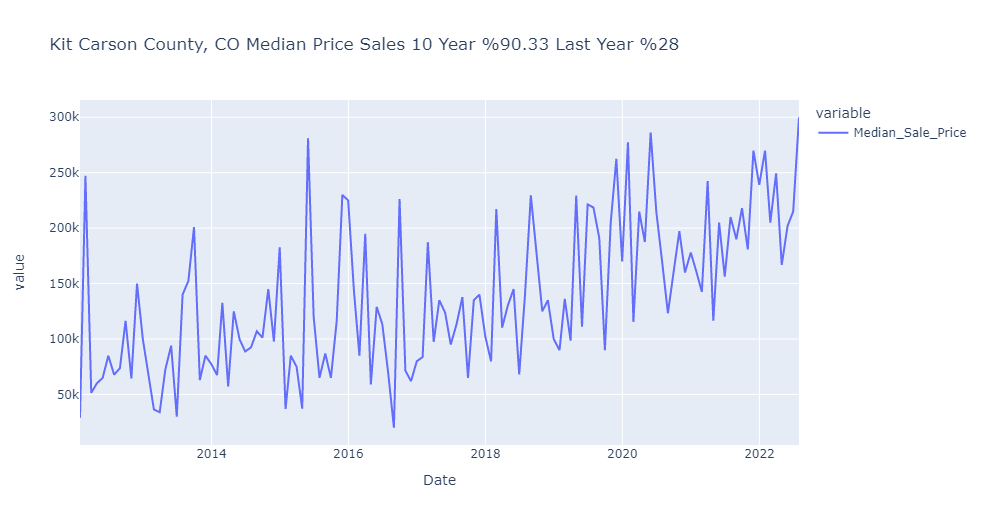

# Get 5 Best Regions with Overall Performance For Drawing

In [106]:
bestfive = dfforchangesboth['Regions'].tolist()

In [ ]:
import plotly.graph_objects as go


fig2 = go.Figure()

for i in bestfive:
    
    fig2.add_trace(go.Marker(
        x = All_Residential[All_Residential['Region'] == i].index.values,
        y=All_Residential[All_Residential['Region'] == f'{i}']['Median_Sale_Price'].values,
        name=i       # this sets its legend entry
    ))




fig2.update_layout(
    title="Best 5 Region Overall",
    xaxis_title="Date",
    yaxis_title="Median Sale Prices",
    legend_title="Comparison ",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple",
    
    )
)



fig2.show() 

# Get Best 5 Region According to 10 year Performance

In [108]:
dfforchangesbest5_10years = dfforchangesbest5['Regions'].tolist()

In [109]:
dfforchangesbest5_10years

['Conejos County, CO',
 'Kit Carson County, CO',
 'Grand County, CO',
 'Yuma County, CO',
 'Cheyenne County, CO']

In [110]:
bestfive

['Conejos County, CO',
 'Dolores County, CO',
 'Kit Carson County, CO',
 'Saguache County, CO',
 'Costilla County, CO']

In [ ]:
import plotly.graph_objects as go


fig2 = go.Figure()

for i in dfforchangesbest5_10years:
    
    fig2.add_trace(go.Marker(
        x = All_Residential[All_Residential['Region'] == i].index.values,
        y=All_Residential[All_Residential['Region'] == f'{i}']['Median_Sale_Price'].values,
        name=i       # this sets its legend entry
    ))




fig2.update_layout(
    title="Best 5 Region According to 10 year Performance",
    xaxis_title="Date",
    yaxis_title="Median Sale Prices",
    legend_title="Comparison ",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple"
    )
)



fig2.show() 

# lst array contains Unique Regions 

In [114]:
lst[:2]

array(['Park County, CO', 'Pitkin County, CO'], dtype=object)

# We sort the data by date to find the % earnings for each year.

In [115]:
All_Residential = All_Residential.sort_values("Date")

# A setting to avoid e notation.

In [117]:
pd.options.display.float_format = '{:.2f}'.format

# I put the years between 2012 and 2023 in a numpy array.

In [118]:
arr = np.arange(2012,2023) 

# This loop adds up the sales prices for each year in each region and divides it by the number of records in that year, so we get an average price for each year.

# It also adds these records to a new dataframe as columns

In [119]:
df = pd.DataFrame()
for county in lst:  
    acounty = All_Residential[All_Residential['Region']==county]
    listforcounty=[]
    for i in arr: 
        if acounty[acounty.index.year == i].Median_Sale_Price.sum() > 0: 
            a = acounty[acounty.index.year == i].Median_Sale_Price.sum() / acounty[acounty.index.year == i].shape[0]
            listforcounty.append(a)
        else:
            listforcounty.append(listforcounty[-1])
    lfcty = pd.Series(listforcounty)
    df = pd.concat([df,lfcty],axis=1)

# Defined the names of the columns of our new data with the help of the list from which we got the names of the regions above.

In [120]:
df.columns = lst

# Data showing average prices over the years for each region.

In [121]:
df

Park County, CO  Pitkin County, CO  Kit Carson County, CO  \
0         189407.12         1292879.17               92529.12   
1         207751.88         1053045.83               89636.36   
2         219083.33         1370041.67              108104.17   
3         251017.50         1521008.33              118635.33   
4         282406.25         1197944.33              104512.50   
5         307912.50         1449062.50              117995.83   
6         339420.83         1266942.88              138200.00   
7         360202.29         1595161.67              168658.33   
8         401479.17         2116041.67              190437.50   
9         491647.92         2115833.33              194204.17   
10        595514.29         2737557.79              229742.86   

    Gilpin County, CO  Clear Creek County, CO  Montezuma County, CO  \
0           217887.50               219216.67             156745.83   
1           234122.92               225312.50             160670.83   
2           262965.21               246416.67             176016.67   
3           284454.17               298829.17             189037.50   
4           329317.62               302317.67             188062.50   
5           336377.08               341803.96             205550.00   
6           380537.50               398219.62             229445.83   
7           406833.33               381870.83             245829.17   
8           441899.42               474345.79             258254.17   
9           509112.88               553643.75             316100.00   
10          544392.86               653257.14             349850.00   

    Denver County, CO  Larimer County, CO  Routt County, CO  \
0           235774.92           224451.04         327576.79   
1           265275.00           239261.12         319879.17   
2           281270.83           255954.54         375608.33   
3           324039.12           299281.33         366858.33   
4           358062.50           331657.25         382357.38   
5           385425.00           351911.88         462191.67   
6           424330.21           380337.75         461566.67   
7           429266.67           389273.04         494195.83   
8           468929.17           408010.08         575682.25   
9           531446.88           469931.75         741008.33   
10          591242.86           544957.14         895500.00   

    Saguache County, CO  ...  Mesa County, CO  La Plata County, CO  \
0              98963.55  ...        184820.79            318712.50   
1             121920.83  ...        217855.21            322975.00   
2             112703.92  ...        196877.58            344925.00   
3             116820.83  ...        191968.75            358566.67   
4             157898.75  ...        204716.67            377420.83   
5             171291.67  ...        213158.33            382345.21   
6             208591.67  ...        253487.50            399416.67   
7             191833.33  ...        265656.25            401087.71   
8             246645.83  ...        297808.33            456887.50   
9             314733.33  ...        355464.54            561949.75   
10            318955.50  ...        400201.43            615579.14   

    Chaffee County, CO  Dolores County, CO  Mineral County, CO  \
0            237500.00           130836.36           248259.09   
1            238149.29           118691.67           208291.67   
2            262858.42           105341.67           195850.00   
3            277179.17           125708.33           204202.08   
4            323425.00           134072.92           245470.83   
5            338695.83           171575.83           336497.92   
6            364564.17           137870.83           323360.42   
7            410120.79           124833.33           260658.33   
8            442764.58           180666.67           348812.50   
9            556208.33           373583.33           432385.42   
10           650157.14           344607.14    

# With the help of this data, we calculate the annual % changes and assign the calculated values to a new data frame.

In [122]:
dfforchanges = pd.DataFrame()

In [123]:
dfforchanges = df.pct_change()

In [124]:
dfforchanges

Park County, CO  Pitkin County, CO  Kit Carson County, CO  \
0               NaN                NaN                    NaN   
1              0.10              -0.19                  -0.03   
2              0.05               0.30                   0.21   
3              0.15               0.11                   0.10   
4              0.13              -0.21                  -0.12   
5              0.09               0.21                   0.13   
6              0.10              -0.13                   0.17   
7              0.06               0.26                   0.22   
8              0.11               0.33                   0.13   
9              0.22              -0.00                   0.02   
10             0.21               0.29                   0.18   

    Gilpin County, CO  Clear Creek County, CO  Montezuma County, CO  \
0                 NaN                     NaN                   NaN   
1                0.07                    0.03                  0.03   
2                0.12                    0.09                  0.10   
3                0.08                    0.21                  0.07   
4                0.16                    0.01                 -0.01   
5                0.02                    0.13                  0.09   
6                0.13                    0.17                  0.12   
7                0.07                   -0.04                  0.07   
8                0.09                    0.24                  0.05   
9                0.15                    0.17                  0.22   
10               0.07                    0.18                  0.11   

    Denver County, CO  Larimer County, CO  Routt County, CO  \
0                 NaN                 NaN               NaN   
1                0.13                0.07             -0.02   
2                0.06                0.07              0.17   
3                0.15                0.17             -0.02   
4                0.10                0.11              0.04   
5                0.08                0.06              0.21   
6                0.10                0.08             -0.00   
7                0.01                0.02              0.07   
8                0.09                0.05              0.16   
9                0.13                0.15              0.29   
10               0.11                0.16              0.21   

    Saguache County, CO  ...  Mesa County, CO  La Plata County, CO  \
0                   NaN  ...              NaN                  NaN   
1                  0.23  ...             0.18                 0.01   
2                 -0.08  ...            -0.10                 0.07   
3                  0.04  ...            -0.02                 0.04   
4                  0.35  ...             0.07                 0.05   
5                  0.08  ...             0.04                 0.01   
6                  0.22  ...             0.19                 0.04   
7                 -0.08  ...             0.05                 0.00   
8                  0.29  ...             0.12                 0.14   
9                  0.28  ...             0.19                 0.23   
10                 0.01  ...             0.13                 0.10   

    Chaffee County, CO  Dolores County, CO  Mineral County, CO  \
0                  NaN                 NaN                 NaN   
1                 0.00               -0.09               -0.16   
2                 0.10               -0.11               -0.06   
3                 0.05                0.19                0.04   
4                 0.17                0.07                0.20   
5                 0.05                0.28                0.37   
6                 0.08               -0.20               -0.04   
7                 0.12               -0.09               -0.19   
8                 0.08                0.45                0.34   
9                 0.26                1.07                0.24   
10                0.17               -0.08    

# Drop first row because there is no change for first year

In [125]:
dfforchanges = dfforchanges.drop([0],axis=0)

In [126]:
dfforchanges

Park County, CO  Pitkin County, CO  Kit Carson County, CO  \
1              0.10              -0.19                  -0.03   
2              0.05               0.30                   0.21   
3              0.15               0.11                   0.10   
4              0.13              -0.21                  -0.12   
5              0.09               0.21                   0.13   
6              0.10              -0.13                   0.17   
7              0.06               0.26                   0.22   
8              0.11               0.33                   0.13   
9              0.22              -0.00                   0.02   
10             0.21               0.29                   0.18   

    Gilpin County, CO  Clear Creek County, CO  Montezuma County, CO  \
1                0.07                    0.03                  0.03   
2                0.12                    0.09                  0.10   
3                0.08                    0.21                  0.07   
4                0.16                    0.01                 -0.01   
5                0.02                    0.13                  0.09   
6                0.13                    0.17                  0.12   
7                0.07                   -0.04                  0.07   
8                0.09                    0.24                  0.05   
9                0.15                    0.17                  0.22   
10               0.07                    0.18                  0.11   

    Denver County, CO  Larimer County, CO  Routt County, CO  \
1                0.13                0.07             -0.02   
2                0.06                0.07              0.17   
3                0.15                0.17             -0.02   
4                0.10                0.11              0.04   
5                0.08                0.06              0.21   
6                0.10                0.08             -0.00   
7                0.01                0.02              0.07   
8                0.09                0.05              0.16   
9                0.13                0.15              0.29   
10               0.11                0.16              0.21   

    Saguache County, CO  ...  Mesa County, CO  La Plata County, CO  \
1                  0.23  ...             0.18                 0.01   
2                 -0.08  ...            -0.10                 0.07   
3                  0.04  ...            -0.02                 0.04   
4                  0.35  ...             0.07                 0.05   
5                  0.08  ...             0.04                 0.01   
6                  0.22  ...             0.19                 0.04   
7                 -0.08  ...             0.05                 0.00   
8                  0.29  ...             0.12                 0.14   
9                  0.28  ...             0.19                 0.23   
10                 0.01  ...             0.13                 0.10   

    Chaffee County, CO  Dolores County, CO  Mineral County, CO  \
1                 0.00               -0.09               -0.16   
2                 0.10               -0.11               -0.06   
3                 0.05                0.19                0.04   
4                 0.17                0.07                0.20   
5                 0.05                0.28                0.37   
6                 0.08               -0.20               -0.04   
7                 0.12               -0.09               -0.19   
8                 0.08                0.45                0.34   
9                 0.26                1.07                0.24   
10                0.17               -0.08               -0.24   

    Yuma County, CO  Washington County, CO  Grand County, CO  \
1              0.24                  -0.39              1.73   
2             -0.05                   0.13             -0.03   
3              1.31                   0.38             -0.17   
4             -0.27                   0.15             -0.

# We multiply the data by 100 to see it as percentages.

In [127]:
dfforchanges  = dfforchanges*100

In [128]:
dfforchanges

Park County, CO  Pitkin County, CO  Kit Carson County, CO  \
1              9.69             -18.55                  -3.13   
2              5.45              30.10                  20.60   
3             14.58              11.02                   9.74   
4             12.50             -21.24                 -11.90   
5              9.03              20.96                  12.90   
6             10.23             -12.57                  17.12   
7              6.12              25.91                  22.04   
8             11.46              32.65                  12.91   
9             22.46              -0.01                   1.98   
10            21.13              29.38                  18.30   

    Gilpin County, CO  Clear Creek County, CO  Montezuma County, CO  \
1                7.45                    2.78                  2.50   
2               12.32                    9.37                  9.55   
3                8.17                   21.27                  7.40   
4               15.77                    1.17                 -0.52   
5                2.14                   13.06                  9.30   
6               13.13                   16.51                 11.63   
7                6.91                   -4.11                  7.14   
8                8.62                   24.22                  5.05   
9               15.21                   16.72                 22.40   
10               6.93                   17.99                 10.68   

    Denver County, CO  Larimer County, CO  Routt County, CO  \
1               12.51                6.60             -2.35   
2                6.03                6.98             17.42   
3               15.21               16.93             -2.33   
4               10.50               10.82              4.22   
5                7.64                6.11             20.88   
6               10.09                8.08             -0.14   
7                1.16                2.35              7.07   
8                9.24                4.81             16.49   
9               13.33               15.18             28.72   
10              11.25               15.97             20.85   

    Saguache County, CO  ...  Mesa County, CO  La Plata County, CO  \
1                 23.20  ...            17.87                 1.34   
2                 -7.56  ...            -9.63                 6.80   
3                  3.65  ...            -2.49                 3.95   
4                 35.16  ...             6.64                 5.26   
5                  8.48  ...             4.12                 1.30   
6                 21.78  ...            18.92                 4.46   
7                 -8.03  ...             4.80                 0.42   
8                 28.57  ...            12.10                13.91   
9                 27.61  ...            19.36                23.00   
10                 1.34  ...            12.59                 9.54   

    Chaffee County, CO  Dolores County, CO  Mineral County, CO  \
1                 0.27               -9.28              -16.10   
2                10.38              -11.25               -5.97   
3                 5.45               19.33                4.26   
4                16.68                6.65               20.21   
5                 4.72               27.97               37.08   
6                 7.64              -19.64               -3.90   
7                12.50               -9.46              -19.39   
8                 7.96               44.73               33.82   
9                25.62              106.78               23.96   
10               16.89               -7.76              -24.42   

    Yuma County, CO  Washington County, CO  Grand County, CO  \
1             23.84                 -39.17            172.86   
2             -5.01                  13.22             -2.77   
3            130.51                  38.47            -16.88   
4            -27.27                  15.14            -15.

# Summing up the increments to get an overall view.

In [129]:
dfforchanges.loc['Total']= dfforchanges.sum()

In [130]:
dfforchanges = dfforchanges.T

In [131]:
arr[1:]

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

# We name our columns with the help of the numpy array we defined above.

In [132]:
dfforchanges.columns=['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022','Total']

# We sort the data by aggregate to see the regions with the highest gains

In [133]:
dfforchanges = dfforchanges.sort_values("Total",ascending=False)

In [134]:
dfforchanges = dfforchanges.T

In [135]:
dfforchanges

Grand County, CO  San Miguel County, CO  Conejos County, CO  \
2013             172.86                  49.36              101.37   
2014              -2.77                   6.83              -31.54   
2015             -16.88                  54.48               21.77   
2016             -15.04                 -27.44              -21.36   
2017              10.52                  70.24               38.08   
2018             212.99                  68.77               33.30   
2019             -53.39                  27.61              -32.35   
2020               9.79                  18.94              118.75   
2021              25.36                  42.98              -11.09   
2022              31.57                 -10.24               32.72   
Total            375.03                 301.52              249.66   

       Yuma County, CO  Sedgwick County, CO  Lake County, CO  \
2013             23.84               -36.92             8.06   
2014             -5.01                35.25             1.09   
2015            130.51                39.84             7.09   
2016            -27.27                -4.57            26.10   
2017            -27.12               -15.35            12.61   
2018             22.47               154.34            21.15   
2019             10.24               -43.32             2.15   
2020             18.87               124.13            13.75   
2021              8.53               -35.54            31.15   
2022             62.74                -6.21            29.78   
Total           217.80               211.65           152.93   

       San Juan County, CO  Dolores County, CO  Saguache County, CO  \
2013                  2.45               -9.28                23.20   
2014                  5.51              -11.25                -7.56   
2015                  4.15               19.33                 3.65   
2016                 12.72                6.65                35.16   
2017                 14.23               27.97                 8.48   
2018                 24.05              -19.64                21.78   
2019                 11.00               -9.46                -8.03   
2020                 -4.98               44.73                28.57   
2021                 39.33              106.78                27.61   
2022                 40.17               -7.76                 1.34   
Total               148.63              148.08               134.20   

       Summit County, CO  ...  Logan County, CO  Alamosa County, CO  \
2013              -12.13  ...             15.66               15.76   
2014               -5.71  ...              0.73               10.23   
2015               23.95  ...              3.91               -5.61   
2016               -0.07  ...              9.15                4.55   
2017               35.40  ...              4.10                6.53   
2018               13.75  ...              8.13                8.18   
2019               -1.54  ...              9.81               16.50   
2020                6.31  ...             10.44                4.21   
2021               32.11  ...             16.44                6.17   
2022               33.68  ...              8.85               19.89   
Total             125.77  ...             87.23               86.40   

       Montezuma County, CO  Mesa County, CO  Broomfield County, CO  \
2013                   2.50            17.87                   1.10   
2014                   9.55            -9.63                  14.54   
2015                   7.40            -2.49                   7.94   
2016                  -0.52             6.64                  10.60   
2017                   9.30             4.12                   8.34   
2018                  11.63            18.92                   3.99   
2019                   7.14             4.80                   7.37   
2020                   5.05            12.10                   3.60   
2021                  22.40            19.36        

# For example, we can see the increases in a region annually in this way.
# You can change y with the name of the region you want and see the earnings rate for that region over the years.

In [ ]:
import plotly.graph_objects as go


fig = go.Figure(go.Scatter ( x = dfforchanges.index[1:10], y = dfforchanges['Dolores County, CO'] ,line=dict(color='black', width=2))
)


fig.update_layout(

    title={
        'text': " Dolores County, CO Total ROI ",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},

    template="simple_white"
    
)


fig.update_xaxes(title='Time (years)',showgrid=False)
fig.update_yaxes(title='ROI (%) ',showgrid=False)


#fig.update_layout(height=600, width=1000)

fig.show()
#fig.write_image(f"images/{template}.png")

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("San Juan County, CO ", "Conejos County", "Grand County, CO", "San Miguel County"),
    column_widths=[0.5, 0.5], row_width=[0.5, 0.5],
     horizontal_spacing = 0.07, vertical_spacing = 0.15)


fig.append_trace(go.Scatter ( 
    x = dfforchanges.index[1:10],
    y = dfforchanges['San Juan County, CO'],
    name="San Juan County, CO",
    line=dict(color='black', width=2),

     
),

row=1, col=1)

fig.append_trace(go.Scatter ( 
    x = dfforchanges.index[1:10],
    y = dfforchanges['Conejos County, CO'],
    name="Conejos County, CO",
    #line=dict(color='black', width=2)

),
row=1, col=2 )


fig.append_trace(go.Scatter ( 
    x = dfforchanges.index[1:10],
    y = dfforchanges['Grand County, CO'],
    name="Grand County, CO",
    #line=dict(color='black', width=2)

),
row=2, col=1 )


fig.append_trace(go.Scatter ( 
    x = dfforchanges.index[1:10],
    y = dfforchanges['San Miguel County, CO'],
    name="San Miguel County, CO",
    #line=dict(color='black', width=2)

),
row=2, col=2 )


fig.update_layout(

    title={
        'text': " ROI's According to Regions",
        'y':0.95,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'},

    template="simple_white"
)



fig.update_layout(height=600, width=1000)
fig.show()